### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import nltk
import re

In [5]:
# Load the dataset

df = pd.read_csv("spam.csv",encoding='latin-1')
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [6]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True) # drop the columns

In [7]:
df.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [8]:
df.columns = ["class","message"] # change the column name

In [9]:
df.head()

class                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [10]:
df["len"] = [len(text) for text in df.message]

In [11]:
df.head()

class                                            message  len
0   ham  Go until jurong point, crazy.. Available only ...  111
1   ham                      Ok lar... Joking wif u oni...   29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...  155
3   ham  U dun say so early hor... U c already then say...   49
4   ham  Nah I don't think he goes to usf, he lives aro...   61

In [12]:
df.describe()

len
count  5572.000000
mean     80.118808
std      59.690841
min       2.000000
25%      36.000000
50%      61.000000
75%     121.000000
max     910.000000

In [13]:
df.groupby('class').describe()

len                                                         
        count        mean        std   min    25%    50%    75%    max
class                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [14]:
df["class"].value_counts()/df["class"].shape[0]*100

ham     86.593683
spam    13.406317
Name: class, dtype: float64

In [15]:
df["class"].shape

(5572,)

In [16]:
df.head()

class                                            message  len
0   ham  Go until jurong point, crazy.. Available only ...  111
1   ham                      Ok lar... Joking wif u oni...   29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...  155
3   ham  U dun say so early hor... U c already then say...   49
4   ham  Nah I don't think he goes to usf, he lives aro...   61

### Word Cloud

In [17]:
stopwords_list = nltk.corpus.stopwords.words("english") # stopwords list for english
tokener = nltk.word_tokenize # to tokenize

In [18]:
from collections import Counter
common_words={'word':[],'count':[]}

for word in df['message']:
    tok = tokener(word)
    #print(tok)
    m_counter = Counter(tok)
    #print(m_counter)
    #print(m_counter.most_common(1))
    common_words['word'].append(m_counter.most_common(1)[0][0])
    common_words['count'].append(m_counter.most_common(1)[0][1])
    #print("=============")


In [19]:
common_words_df = pd.concat([df,pd.DataFrame(common_words)],axis=1)
common_words_df

class                                            message  len  word  \
0      ham  Go until jurong point, crazy.. Available only ...  111   ...   
1      ham                      Ok lar... Joking wif u oni...   29   ...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...  155    to   
3      ham  U dun say so early hor... U c already then say...   49     U   
4      ham  Nah I don't think he goes to usf, he lives aro...   61    he   
...    ...                                                ...  ...   ...   
5567  spam  This is the 2nd time we have tried 2 contact u...  161     .   
5568   ham              Will Ì_ b going to esplanade fr home?   37  Will   
5569   ham  Pity, * was in mood for that. So...any other s...   57  Pity   
5570   ham  The guy did some bitching but I acted like i'd...  125   The   
5571   ham                         Rofl. Its true to its name   26  Rofl   

      count  
0         2  
1         2  
2         3  
3         2  
4         2  
...     ...  
5567      3  
5568      1  
5569      1  
5570      1  
5571      1  

[5572 rows x 5 columns]

In [20]:
#' '.join(common_words_df['word'])

In [21]:
#! pip install wordcloud
import wordcloud
words_cloud = wordcloud.WordCloud().generate_from_text(' '.join(common_words_df['word']))

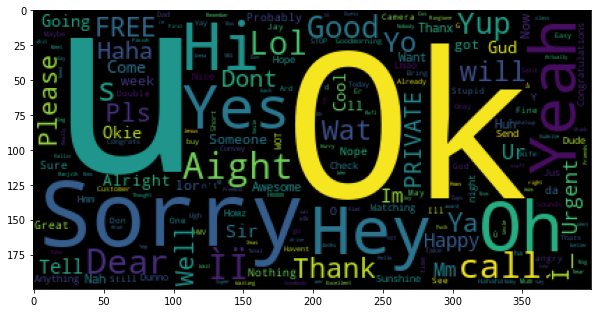

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.imshow(words_cloud)

In [23]:
df.head()

class                                            message  len
0   ham  Go until jurong point, crazy.. Available only ...  111
1   ham                      Ok lar... Joking wif u oni...   29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...  155
3   ham  U dun say so early hor... U c already then say...   49
4   ham  Nah I don't think he goes to usf, he lives aro...   61

In [24]:
df.drop(["len"],axis=1,inplace=True)

In [25]:
def remove_punch(text):
    clean_words = re.sub(r"[^a-zA-Z0-9]"," ",text.lower())
    return clean_words

df.message = df.message.apply(remove_punch)

In [26]:
df.message

0       go until jurong point  crazy   available only ...
1                           ok lar    joking wif u oni   
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor    u c already then say   
4       nah i don t think he goes to usf  he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will    b going to esplanade fr home 
5569    pity    was in mood for that  so   any other s...
5570    the guy did some bitching but i acted like i d...
5571                           rofl  its true to its name
Name: message, Length: 5572, dtype: object

In [27]:
def remove_whitespace(text):
    cleaned_space = re.sub(' +'," ",text)
    return cleaned_space
df.message = df.message.apply(remove_whitespace)

In [28]:
df.message[0]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat '

In [29]:
def remove_stopwords(text):
    tok_word = tokener(text)
    clean_words=[]
    for word in tok_word:
        if word in stopwords_list:
            continue
        else: 
            clean_words.append(word)
    words = ' '.join(clean_words)
    return words

df.message = df.message.apply(remove_stopwords)

In [30]:
df.message

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u 750 pound prize 2...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [31]:
ham_class = df[df['class']=="ham"]
spam_class = df[df['class']=="spam"]

In [32]:
ham_class.message

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
6          even brother like speak treat like aids patent
                              ...                        
5565                                              huh lei
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 4825, dtype: object

In [33]:
ham_text = ' '.join(ham_class.message)
spam_text = ' '.join(spam_class.message)

In [34]:
ham_words_cloud = wordcloud.WordCloud().generate_from_text(ham_text)
spam_words_cloud = wordcloud.WordCloud().generate_from_text(spam_text)

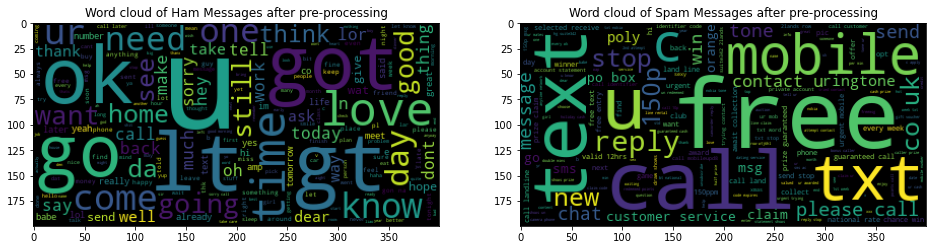

In [35]:
plt.figure(figsize=(16,12))
plt.subplot(121)
plt.title("Word cloud of Ham Messages after pre-processing")
plt.imshow(ham_words_cloud)
plt.subplot(122)
plt.title("Word cloud of Spam Messages after pre-processing")
plt.imshow(spam_words_cloud)

In [36]:
def remove_digits(text):
    clean_words = re.sub(r"[^a-zA-Z]"," ",text.lower())
    return clean_words

df.message = df.message.apply(remove_digits)

In [37]:
df.message[2]

'free entry   wkly comp win fa cup final tkts   st may      text fa       receive entry question std txt rate c apply            over  '

In [38]:
df.message = df.message.apply(remove_whitespace)

In [39]:
df.message[2]

'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply over '

In [40]:
lm=nltk.WordNetLemmatizer()

In [41]:
def lemma(text):
    tok_word = tokener(text)
    lemma_word =[]
    # print("token :",tok_word)
    for tok in tok_word:
        lemma_tok = lm.lemmatize(tok)
        lemma_word.append(lemma_tok)
    # print("lemmatization :",lemma_word)
    final_text= " ".join(lemma_word)
    # print("Final text :",final_text)
    return final_text

In [42]:
df.message = df.message.apply(lemma)

### Bag of words

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english',max_features=2500,ngram_range=(1,2))
scaled_X = cv.fit_transform(df.message)

In [44]:
df_bow_sklearn = pd.DataFrame(scaled_X.toarray(),columns=cv.get_feature_names())
df_bow_sklearn.head()

C:\Users\JIBSON JOY\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


aathi  abiola  able  abt  ac  acc  accept  access  accidentally  account  \
0      0       0     0    0   0    0       0       0             0        0   
1      0       0     0    0   0    0       0       0             0        0   
2      0       0     0    0   0    0       0       0             0        0   
3      0       0     0    0   0    0       0       0             0        0   
4      0       0     0    0   0    0       0       0             0        0   

   ...  ym  yo  yo yo  yoga  yogasana  yr  yun  yup  yup thk  zed  
0  ...   0   0      0     0         0   0    0    0        0    0  
1  ...   0   0      0     0         0   0    0    0        0    0  
2  ...   0   0      0     0         0   0    0    0        0    0  
3  ...   0   0      0     0         0   0    0    0        0    0  
4  ...   0   0      0     0         0   0    0    0        0    0  

[5 rows x 2500 columns]

In [45]:
df['class'] = df['class'].map({'spam':1,'ham':0})

In [46]:
# train Test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_bow_sklearn,df['class'],test_size=0.3,random_state=42)

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)



RandomForestClassifier()

In [48]:
y_pred = clf.predict(X_test)

In [49]:
# metrics
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.9730861244019139

In [50]:
clf.score(X_train,y_train)

0.9997435897435898

In [51]:
clf.score(X_test,y_test)

0.9730861244019139

### TF-IDF

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(ngram_range=(1,3),max_features=2500)
scaled_X_tf =  tf_idf.fit_transform(df.message)


In [53]:
df_tfidf_sklearn = pd.DataFrame(scaled_X_tf.toarray(),columns=tf_idf.get_feature_names())
df_tfidf_sklearn.head()

C:\Users\JIBSON JOY\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


aathi  abiola  able  abt   ac  acc  accept  access  account  \
0    0.0     0.0   0.0  0.0  0.0  0.0     0.0     0.0      0.0   
1    0.0     0.0   0.0  0.0  0.0  0.0     0.0     0.0      0.0   
2    0.0     0.0   0.0  0.0  0.0  0.0     0.0     0.0      0.0   
3    0.0     0.0   0.0  0.0  0.0  0.0     0.0     0.0      0.0   
4    0.0     0.0   0.0  0.0  0.0  0.0     0.0     0.0      0.0   

   account statement  ...  yet  yijue   ym   yo  yoga  yogasana   yr  yun  \
0                0.0  ...  0.0    0.0  0.0  0.0   0.0       0.0  0.0  0.0   
1                0.0  ...  0.0    0.0  0.0  0.0   0.0       0.0  0.0  0.0   
2                0.0  ...  0.0    0.0  0.0  0.0   0.0       0.0  0.0  0.0   
3                0.0  ...  0.0    0.0  0.0  0.0   0.0       0.0  0.0  0.0   
4                0.0  ...  0.0    0.0  0.0  0.0   0.0       0.0  0.0  0.0   

   yup  zed  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 2500 columns]

In [54]:
# train Test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_tfidf_sklearn,df['class'],test_size=0.3,random_state=42)

In [55]:
clf_tfidf = RandomForestClassifier()
clf_tfidf.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
clf_tfidf.score(X_train,y_train)

0.9997435897435898

In [57]:
clf_tfidf.score(X_test,y_test)

0.9796650717703349

### Word2Vec

In [1]:
pip install gensim

  Using cached gensim-4.2.0-cp39-cp39-win_amd64.whl (23.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [58]:
df.head()

class                                            message
0      0  go jurong point crazy available bugis n great ...
1      0                            ok lar joking wif u oni
2      1  free entry wkly comp win fa cup final tkts st ...
3      0                u dun say early hor u c already say
4      0                nah think go usf life around though

In [59]:
df.shape

(5572, 2)

In [60]:
df['class']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: class, Length: 5572, dtype: int64

In [61]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
words=[]
classList=[]
for sent,classVal in zip(df['message'],df['class']):
    sent_token = sent_tokenize(sent)
    
    for sent in sent_token:
        words.append(simple_preprocess(sent))
        classList.append(classVal)


In [62]:
# from gensim.utils import simple_preprocess

import gensim
import gensim.downloader as api
#wv=api.load('word2vec-google-news-300')

In [63]:
len(words)

5564

In [64]:
model = gensim.models.Word2Vec(words,window=5,min_count=2)

In [65]:
model.corpus_count

5564

In [66]:
df.shape

(5572, 2)

In [67]:
model.epochs

5

In [68]:
model.wv.similar_by_word('world')

[('say', 0.9995455145835876),
 ('tell', 0.9995405077934265),
 ('ur', 0.9995232224464417),
 ('one', 0.9995228052139282),
 ('today', 0.9995209574699402),
 ('like', 0.9995133876800537),
 ('back', 0.9995108842849731),
 ('get', 0.9995076656341553),
 ('feel', 0.9995030760765076),
 ('said', 0.9994989633560181)]

In [90]:
model.wv['say']

array([-0.26920483,  0.48803455,  0.06248203,  0.06090894, -0.00402831,
       -0.7047094 ,  0.22351189,  0.997943  , -0.33108363, -0.31471545,
       -0.20846613, -0.6607256 , -0.02901751,  0.15911655,  0.18055747,
       -0.36536813, -0.0486801 , -0.61595654,  0.01728288, -0.7977109 ,
        0.2475765 ,  0.31677997,  0.12708892, -0.08617694, -0.15118001,
       -0.00189502, -0.385239  , -0.47370288, -0.42895097,  0.12875439,
        0.40254268,  0.03983459,  0.16364346, -0.28253677, -0.14192136,
        0.5756846 ,  0.00742745, -0.46838042, -0.29483154, -0.85533744,
       -0.12423491, -0.38508263, -0.04016414,  0.08338775,  0.4774863 ,
       -0.14371093, -0.42533302, -0.03547034,  0.14866243,  0.30089265,
        0.16910452, -0.5076997 , -0.15713196, -0.18762493, -0.24436687,
        0.25401127,  0.16671342, -0.00860835, -0.4086393 ,  0.06628707,
        0.0676093 ,  0.19426368, -0.16350122, -0.10191877, -0.62865174,
        0.3882498 ,  0.11757065,  0.3052149 , -0.53804034,  0.60

In [70]:
def avg_word2vec(doc):
    outResult=np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
    return(outResult)


In [71]:
X=[]
for i in  range(len(words)):
    X.append(avg_word2vec(words[i]))

c:\Users\JIBSON JOY\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\JIBSON JOY\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [91]:
X

[[-0.1488378345966339,
  0.2663951814174652,
  0.03869520127773285,
  0.030978938564658165,
  -0.0013888204703107476,
  -0.3850911557674408,
  0.11608725786209106,
  0.5362384915351868,
  -0.1735089272260666,
  -0.17496967315673828,
  -0.10607358068227768,
  -0.3563614785671234,
  -0.01896185614168644,
  0.088771291077137,
  0.1007114127278328,
  -0.1950470209121704,
  -0.03153523802757263,
  -0.3333413302898407,
  0.014226719737052917,
  -0.428823322057724,
  0.1279737949371338,
  0.16369350254535675,
  0.06257183849811554,
  -0.045317620038986206,
  -0.08407162874937057,
  -0.004375577904284,
  -0.21023888885974884,
  -0.26090186834335327,
  -0.22994768619537354,
  0.07078159600496292,
  0.21193517744541168,
  0.02260272204875946,
  0.08304572105407715,
  -0.14652593433856964,
  -0.07723090797662735,
  0.31275081634521484,
  0.00614599185064435,
  -0.25167086720466614,
  -0.1581408977508545,
  -0.4587325155735016,
  -0.059914663434028625,
  -0.20950795710086823,
  -0.0248860642313957

In [72]:
X[73]

nan

In [73]:
words[73]

['performed']

In [74]:
df['message'][73]

'k k performed'

In [75]:
[model.wv[word] for word in words[73] if word in model.wv.index_to_key]

[]

In [76]:
def avg_word2vec(doc):
    val=[model.wv[word] for word in doc if word in model.wv.index_to_key]
    if len(val) !=0:
        outResult = np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
    else:
        outResult=np.asarray([])
    return outResult

In [77]:
X=[]
for i in  range(len(words)):
    X.append(avg_word2vec(words[i]))

#X = [arr.tolist() for arr in X]

In [78]:
X = [arr.tolist() for arr in X]


In [79]:
Final_X=[]
labels_y=[]
for X_val,classVal in zip(X,classList):
    if len(X_val)!=0:
        Final_X.append(X_val)
        labels_y.append(classVal)



In [80]:
len(Final_X)

5541

In [92]:
Final_X

[[-0.1488378345966339,
  0.2663951814174652,
  0.03869520127773285,
  0.030978938564658165,
  -0.0013888204703107476,
  -0.3850911557674408,
  0.11608725786209106,
  0.5362384915351868,
  -0.1735089272260666,
  -0.17496967315673828,
  -0.10607358068227768,
  -0.3563614785671234,
  -0.01896185614168644,
  0.088771291077137,
  0.1007114127278328,
  -0.1950470209121704,
  -0.03153523802757263,
  -0.3333413302898407,
  0.014226719737052917,
  -0.428823322057724,
  0.1279737949371338,
  0.16369350254535675,
  0.06257183849811554,
  -0.045317620038986206,
  -0.08407162874937057,
  -0.004375577904284,
  -0.21023888885974884,
  -0.26090186834335327,
  -0.22994768619537354,
  0.07078159600496292,
  0.21193517744541168,
  0.02260272204875946,
  0.08304572105407715,
  -0.14652593433856964,
  -0.07723090797662735,
  0.31275081634521484,
  0.00614599185064435,
  -0.25167086720466614,
  -0.1581408977508545,
  -0.4587325155735016,
  -0.059914663434028625,
  -0.20950795710086823,
  -0.0248860642313957

In [82]:
df = pd.DataFrame(Final_X)
df[100]=labels_y

In [83]:
df

0         1         2         3         4         5         6    \
0    -0.148838  0.266395  0.038695  0.030979 -0.001389 -0.385091  0.116087   
1    -0.092873  0.172283  0.021721  0.023885 -0.001185 -0.254943  0.075232   
2    -0.139169  0.245106  0.030121  0.031663  0.004208 -0.347616  0.105096   
3    -0.180130  0.326462  0.046223  0.040146 -0.001809 -0.465496  0.143073   
4    -0.174955  0.313919  0.049954  0.031390  0.000669 -0.456397  0.138970   
...        ...       ...       ...       ...       ...       ...       ...   
5536 -0.178743  0.327170  0.036100  0.039006  0.007448 -0.464848  0.142655   
5537 -0.158071  0.269614  0.043868  0.025748 -0.006324 -0.397313  0.120128   
5538 -0.025832  0.042876  0.009982  0.006181 -0.002972 -0.064086  0.014777   
5539 -0.159976  0.287722  0.039435  0.033695  0.002765 -0.410676  0.123947   
5540 -0.119704  0.206346  0.025589  0.024348 -0.007288 -0.290509  0.087887   

           7         8         9    ...       91        92        93   \
0     0.536238 -0.173509 -0.174970  ...  0.210830 -0.012192  0.121010   
1     0.360475 -0.114930 -0.113838  ...  0.143523 -0.008389  0.078734   
2     0.488691 -0.156271 -0.151555  ...  0.191669 -0.013595  0.107869   
3     0.660760 -0.217197 -0.208700  ...  0.256290 -0.009717  0.152452   
4     0.643930 -0.212016 -0.207262  ...  0.249676 -0.011031  0.143149   
...        ...       ...       ...  ...       ...       ...       ...   
5536  0.657450 -0.209071 -0.202348  ...  0.259342 -0.018530  0.141057   
5537  0.561328 -0.183829 -0.183368  ...  0.214194 -0.011229  0.122401   
5538  0.097257 -0.030330 -0.032683  ...  0.029548 -0.000530  0.016483   
5539  0.578686 -0.185739 -0.179058  ...  0.226824 -0.012557  0.127051   
5540  0.411113 -0.134017 -0.122727  ...  0.156810 -0.008992  0.091042   

           94        95        96        97        98        99   100  
0     0.454545  0.267608  0.141604 -0.259283  0.102895 -0.033927    0  
1     0.304608  0.179362  0.097850 -0.176784  0.069501 -0.017628    0  
2     0.412039  0.246552  0.121848 -0.229151  0.096618 -0.027531    1  
3     0.562392  0.324478  0.177214 -0.316090  0.120579 -0.042037    0  
4     0.542986  0.316388  0.169063 -0.311103  0.122396 -0.043064    0  
...        ...       ...       ...       ...       ...       ...  ...  
5536  0.559649  0.330775  0.162790 -0.312905  0.127457 -0.034541    1  
5537  0.470657  0.276030  0.150265 -0.270516  0.111699 -0.033283    0  
5538  0.077408  0.043471  0.020213 -0.041023  0.020563 -0.009284    0  
5539  0.494248  0.291674  0.152402 -0.275777  0.111446 -0.033979    0  
5540  0.350276  0.200508  0.108611 -0.203497  0.075010 -0.028088    0  

[5541 rows x 101 columns]

In [84]:
df[100]

0       0
1       0
2       1
3       0
4       0
       ..
5536    1
5537    0
5538    0
5539    0
5540    0
Name: 100, Length: 5541, dtype: int64

In [85]:
X_cleaned = df.drop([100],axis=1)
y_cleaned=df[100]
# train Test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_cleaned,y_cleaned,test_size=0.3,random_state=42)

In [86]:
clf_word2vec = RandomForestClassifier()
clf_word2vec.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
clf_word2vec.score(X_train,y_train)

1.0

In [88]:
clf_word2vec.score(X_test,y_test)

0.9549007817197835